<a href="https://colab.research.google.com/github/powerzin8/first-repository/blob/master/250821_%ED%86%B5%EA%B3%84%ED%95%99_Day7_MainQuest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2,12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2,12


In [ ]:
df['DayOfWeek'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int32)

In [ ]:
df['InvoiceMonth'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [ ]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [ ]:
sample_data = df.sample(n=1000, random_state=42)
display(sample_data.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,20.40,2,6
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,27.80,4,5
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2.60,3,4
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,5.85,2,11
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,19.90,3,3


In [ ]:
df_mean = np.mean(df['TotalPrice'])
df_std = np.std(df['TotalPrice'], ddof=1)

print(f"전체 데이터셋의 TotalPrice 평균 : {df_mean}")
print(f"전체 데이터셋의 TotalPrice 표준편차 : {df_std}")

전체 데이터셋의 TotalPrice 평균 : 17.98779487699964
전체 데이터셋의 TotalPrice 표준편차 : 378.81082350615196


In [ ]:
sample_mean = np.mean(sample_data['TotalPrice'])
sample_std = np.std(sample_data['TotalPrice'], ddof=1)

print(f"표본의 TotalPrice 평균 : {sample_mean}")
print(f"표본의 TotalPrice 표준편차 : {sample_std}")

표본의 TotalPrice 평균 : 16.832069999999998
표본의 TotalPrice 표준편차 : 64.46732773087352


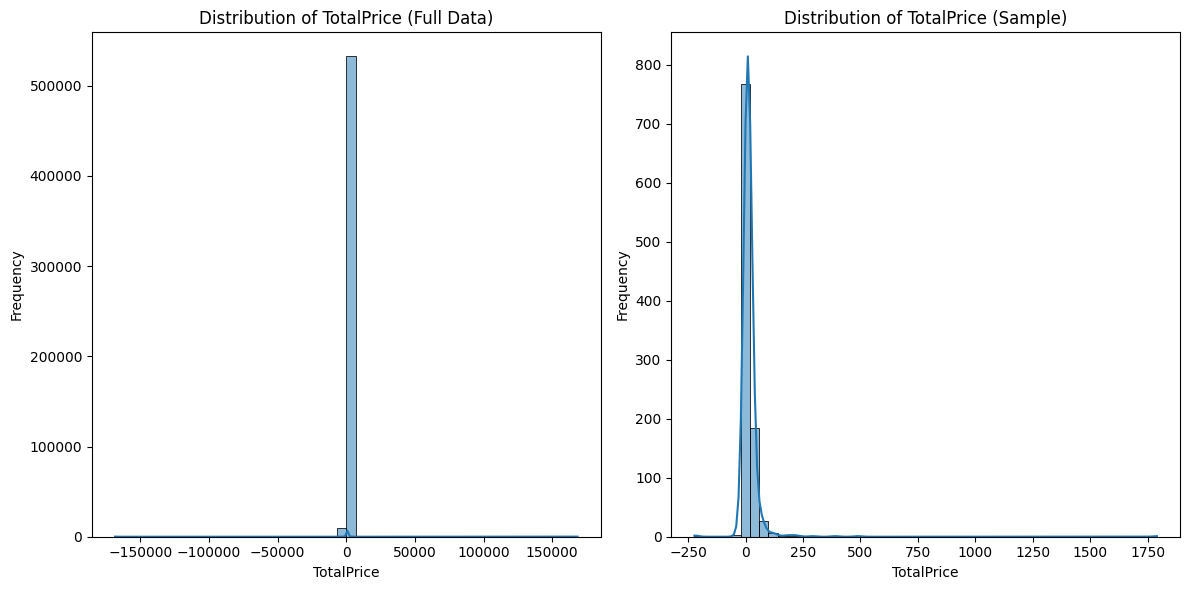

In [ ]:
# 중심극한정리를 사용해 모집단과 표본의 차이를 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of TotalPrice (Full Data)')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(sample_df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of TotalPrice (Sample)')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##* 중심극한정리 설명 : 샘플 1000개의 평균은 모집단 평균과 유사하게 나타났음 (샘플 크기가 더 커지면 더 모집단과 비슷해질것)

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [ ]:
# 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
top_countries = df['Country'].value_counts().nlargest(2).index.tolist()
print(f"주문이 가장 많은 상위 두 국가: {top_countries}")

주문이 가장 많은 상위 두 국가: ['United Kingdom', 'Germany']


In [ ]:
# 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요

from scipy.stats import ttest_ind

# top 1, 2 나라의 데이터를 필터링
country1_df = df[df['Country'] == top_countries[0]]
country2_df = df[df['Country'] == top_countries[1]]

# 독립표본 t-검정 수행
ttest_result = ttest_ind(country1_df['TotalPrice'], country2_df['TotalPrice'], nan_policy='omit')

# 결과
print(f"독립표본 t-검정 결과:")
print(f"T-statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")

독립표본 t-검정 결과:
T-statistic: -1.6839
P-value: 0.0922


t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

##* P값이 0.05 이상이므로 귀무가설을 기각할수 없다 > 두 국가간 TotalPrice 평균 차이가 통계적으로 유의미한 차이가 없다고 볼수 있다
##* p값이 0.05 이상인만큼, 귀무가설을 기각하고 대립가설을 잘못 채택할 1종 오류일 확률은 낮다
 2종오류의 가능성은 존재한다

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [ ]:
# Separate data into weekday and weekend
weekday_df = df[df['DayOfWeek'] < 5]  # Monday to Friday are 0 to 4
weekend_df = df[df['DayOfWeek'] >= 5] # Saturday and Sunday are 5 and 6

# Calculate descriptive statistics for UnitPrice on weekdays
weekday_unitprice_desc = weekday_df['UnitPrice'].describe()

# Calculate descriptive statistics for UnitPrice on weekends
weekend_unitprice_desc = weekend_df['UnitPrice'].describe()

print("주중 UnitPrice 설명 통계값들:")
print(weekday_unitprice_desc)
print("\n주말 UnitPrice 설명 통계값들:")
print(weekend_unitprice_desc)

주중 UnitPrice 설명 통계값들:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주말 UnitPrice 설명 통계값들:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64


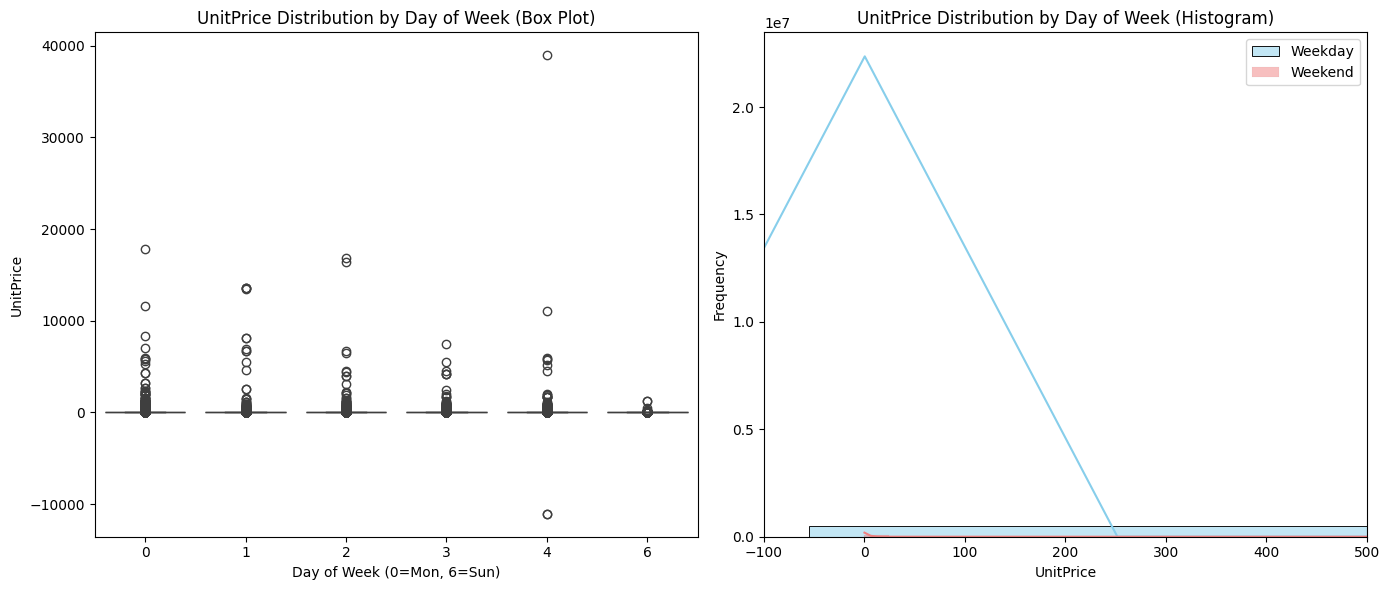

In [ ]:
# Visualize the distributions using box plots and histograms
plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='DayOfWeek', y='UnitPrice', data=df)
plt.title('UnitPrice Distribution by Day of Week (Box Plot)')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('UnitPrice')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(weekday_df['UnitPrice'], bins=50, kde=True, color='skyblue', label='Weekday')
sns.histplot(weekend_df['UnitPrice'], bins=50, kde=True, color='lightcoral', label='Weekend')
plt.title('UnitPrice Distribution by Day of Week (Histogram)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(-100, 500) # Limit x-axis for better visualization due to outliers

plt.tight_layout()
plt.show()

## 해석 : 주말보다 주중의 UnitPrice 가격대가 높고, 판매건수도 많은것으로 확인 (표준편차도 주중이 훨씬 높다)

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [ ]:
# 결측치 제거
regression_df = df.dropna(subset=['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']).copy()

# Quantity, UnitPrice에서 음수값 제거(0이상만 저장)
regression_df = regression_df[(regression_df['Quantity'] > 0) & (regression_df['UnitPrice'] > 0)]

# 피쳐(독립변수)와 타겟(종속변수) 설정
X = regression_df[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]
y = regression_df['Quantity']

# 범주형 변수인 Country를 원핫인코딩 처리
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

display(X.head())
display(y.head())

,UnitPrice,DayOfWeek,InvoiceMonth,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,2.55,2,12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3.39,2,12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2.75,2,12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3.39,2,12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3.39,2,12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


,Quantity
0,6
1,6
2,8
3,6
4,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Convert boolean columns to integers (0 or 1)
X = X.astype(int)

# Add a constant to the independent variables for statsmodels
X = sm.add_constant(X)

# Build and train the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.55
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.12e-171
Time:                        05:57:15   Log-Likelihood:            -3.4270e+06
No. Observations:              530104   AIC:                         6.854e+06
Df Residuals:                  530063   BIC:                         6.855e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##* 회귀계수(coef) 해석 : 피쳐별 상이. UnitPrice 정도만 다소 유의미
##* 결정계수(R squared) 해석 : 0.002 로 현 상태로는 설명력이 매우 낮다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [ ]:
# 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요

# CustomerID의 결측치 제거
regression_df = df.dropna(subset=['CustomerID']).copy()

# Quantity, UnitPrice 양수만 취함
regression_df = regression_df[(regression_df['Quantity'] != 0) & (regression_df['UnitPrice'] > 0)].copy()

display(regression_df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [ ]:
# Quantity 피쳐를 활용해 IsReturn 피쳐를 생성하세요
# IsReturn = Quantity이 음수면 1
regression_df['IsReturn'] = (regression_df['Quantity'] < 0).astype(int)

display(regression_df.head())

# IsReturn의 분포
display(regression_df['IsReturn'].value_counts())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0


,count
IsReturn,
0,397884
1,8905


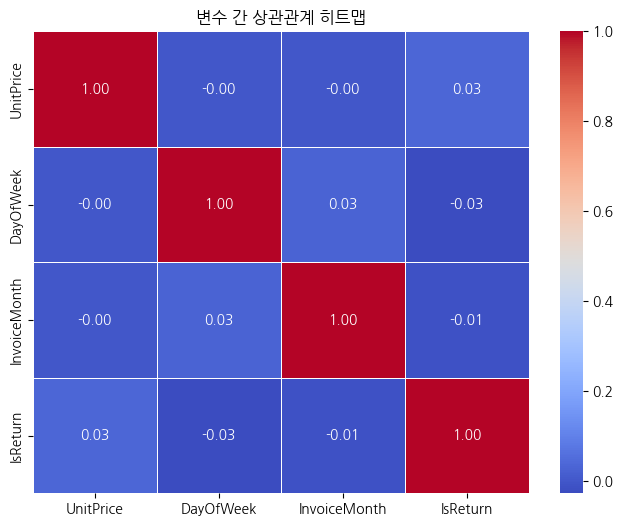

In [ ]:
# 피쳐 간 상관관계 계산
# 'IsReturn'을 포함한 데이터프레임을 사용
correlation_matrix = regression_df[['UnitPrice', 'DayOfWeek', 'InvoiceMonth', 'IsReturn']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [ ]:
# Install a Korean font
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# Configure matplotlib to use the new font
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # Allow negative signs in plots

print("Korean font configured.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Select features (excluding Quantity and TotalPrice as they are directly related to the target)
features = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
X = regression_df[features].copy()
y = regression_df['IsReturn']

# One-hot encode the 'Country' feature
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# Scale numerical features (UnitPrice)
scaler = StandardScaler()
X[['UnitPrice']] = scaler.fit_transform(X[['UnitPrice']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Removed stratify=y

print("학습 데이터 형태 (X_train, y_train):", X_train.shape, y_train.shape)
print("테스트 데이터 형태 (X_test, y_test):", X_test.shape, y_test.shape)

# Train the logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

print("\n로지스틱 회귀 모델 학습 완료.")

학습 데이터 형태 (X_train, y_train): (284752, 39) (284752,)
테스트 데이터 형태 (X_test, y_test): (122037, 39) (122037,)

로지스틱 회귀 모델 학습 완료.


In [76]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("혼동 행렬:")
print(conf_matrix)
print("\n분류 보고서:")
print(class_report)
print(f"\n정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

혼동 행렬:
[[119315      1]
 [  2716      5]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    119316
           1       0.83      0.00      0.00      2721

    accuracy                           0.98    122037
   macro avg       0.91      0.50      0.50    122037
weighted avg       0.97      0.98      0.97    122037


정확도 (Accuracy): 0.9777
정밀도 (Precision): 0.8333
재현율 (Recall): 0.0018
F1-score: 0.0037


##* 재현율 0.0018로 매우 낮음
##* 결과 해석 : False Negative 2716 실제 반품을 반품이 아니라고 잘못 예측한 경우(2종 오류) 가 매우 많은 상태

# 개선방안 1 : 고객별 반품 비율을 계산하여 피쳐에 추가

In [82]:
# 1. 고객별 총 거래 횟수 계산
customer_total_transactions = regression_df['CustomerID'].value_counts().reset_index()
customer_total_transactions.columns = ['CustomerID', 'TotalTransactions']
display(customer_total_transactions.head())

# 2. 고객별 총 반품 횟수 계산
customer_returns = regression_df[regression_df['IsReturn'] == 1]['CustomerID'].value_counts().reset_index()
customer_returns.columns = ['CustomerID', 'TotalReturns']
display(customer_returns.head())

# 3. 고객별 반품 비율 계산 및 데이터프레임 병합
customer_return_rate_df = pd.merge(customer_total_transactions, customer_returns, on='CustomerID', how='left').fillna(0)
customer_return_rate_df['ReturnRate'] = customer_return_rate_df['TotalReturns'] / customer_return_rate_df['TotalTransactions']
display(customer_return_rate_df.head())

# 4. 데이터프레임에 반품 비율 추가
regression_df = pd.merge(regression_df, customer_return_rate_df[['CustomerID', 'ReturnRate']], on='CustomerID', how='left')
display(regression_df.head())

,CustomerID,TotalTransactions
0,17841.0,7983
1,14911.0,5901
2,14096.0,5128
3,12748.0,4641
4,14606.0,2782


,CustomerID,TotalReturns
0,14911.0,226
1,17841.0,136
2,17511.0,113
3,15311.0,112
4,12607.0,101


,CustomerID,TotalTransactions,TotalReturns,ReturnRate
0,17841.0,7983,136.0,0.017036
1,14911.0,5901,226.0,0.038299
2,14096.0,5128,17.0,0.003315
3,12748.0,4641,46.0,0.009912
4,14606.0,2782,82.0,0.029475


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn,ReturnRate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,0,0.048077
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0,0.048077
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,0,0.048077
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0,0.048077
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,0,0.048077


In [83]:
# 5. 데이터 준비 및 분할

# Select features including the new 'ReturnRate' feature
features_new = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth', 'ReturnRate']
X_new = regression_df[features_new].copy()
y_new = regression_df['IsReturn']

# One-hot encode the 'Country' feature
X_new = pd.get_dummies(X_new, columns=['Country'], drop_first=True)

# Scale numerical features (UnitPrice and ReturnRate)
scaler_new = StandardScaler()
X_new[['UnitPrice', 'ReturnRate']] = scaler_new.fit_transform(X_new[['UnitPrice', 'ReturnRate']])

# Split data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

print("새로운 피쳐 포함 학습 데이터 형태 (X_train_new, y_train_new):", X_train_new.shape, y_train_new.shape)
print("새로운 피쳐 포함 테스트 데이터 형태 (X_test_new, y_test_new):", X_test_new.shape, y_test_new.shape)

새로운 피쳐 포함 학습 데이터 형태 (X_train_new, y_train_new): (284752, 40) (284752,)
새로운 피쳐 포함 테스트 데이터 형태 (X_test_new, y_test_new): (122037, 40) (122037,)


In [85]:
# 8. 모델 재평가

# Make predictions on the test set using the new model
y_pred_new = model_new.predict(X_test_new)

# Evaluate the new model
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
class_report_new = classification_report(y_test_new, y_pred_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

print("새로운 피쳐 포함 모델 혼동 행렬:")
print(conf_matrix_new)
print("\n새로운 피쳐 포함 모델 분류 보고서:")
print(class_report_new)
print(f"\n새로운 피쳐 포함 모델 정확도 (Accuracy): {accuracy_new:.4f}")
print(f"새로운 피쳐 포함 모델 정밀도 (Precision): {precision_new:.4f}")
print(f"새로운 피쳐 포함 모델 재현율 (Recall): {recall_new:.4f}")
print(f"새로운 피쳐 포함 모델 F1-score: {f1_new:.4f}")

새로운 피쳐 포함 모델 혼동 행렬:
[[119082    234]
 [  2557    164]]

새로운 피쳐 포함 모델 분류 보고서:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    119316
           1       0.41      0.06      0.11      2721

    accuracy                           0.98    122037
   macro avg       0.70      0.53      0.55    122037
weighted avg       0.97      0.98      0.97    122037


새로운 피쳐 포함 모델 정확도 (Accuracy): 0.9771
새로운 피쳐 포함 모델 정밀도 (Precision): 0.4121
새로운 피쳐 포함 모델 재현율 (Recall): 0.0603
새로운 피쳐 포함 모델 F1-score: 0.1052


## 개선방안 2 : 오버샘플링 (BorderlineSMOTE) 적용

In [86]:
from imblearn.over_sampling import BorderlineSMOTE

# Borderline-SMOTE 객체 생성 (kind='borderline-1' 또는 'borderline-2' 시도 가능)
# 여기서는 기본값인 borderline-1을 사용합니다.
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')

# 학습 데이터에 Borderline-SMOTE 적용
X_train_bsmote, y_train_bsmote = borderline_smote.fit_resample(X_train_new, y_train_new) # Use data with new feature

print("Borderline-SMOTE 적용 전 학습 데이터 형태:", X_train_new.shape, y_train_new.shape)
print("Borderline-SMOTE 적용 후 학습 데이터 형태:", X_train_bsmote.shape, y_train_bsmote.shape)

print("\nBorderline-SMOTE 적용 후 타겟 클래스 분포:")
print(y_train_bsmote.value_counts())

Borderline-SMOTE 적용 전 학습 데이터 형태: (284752, 40) (284752,)
Borderline-SMOTE 적용 후 학습 데이터 형태: (557136, 40) (557136,)

Borderline-SMOTE 적용 후 타겟 클래스 분포:
IsReturn
0    278568
1    278568
Name: count, dtype: int64


In [87]:
# Train a new logistic regression model using the Borderline-SMOTE resampled data
model_bsmote = LogisticRegression(random_state=42, solver='liblinear')
model_bsmote.fit(X_train_bsmote, y_train_bsmote)

print("Borderline-SMOTE 데이터로 로지스틱 회귀 모델 학습 완료.")

Borderline-SMOTE 데이터로 로지스틱 회귀 모델 학습 완료.


In [88]:
# 8. 모델 재평가

# Make predictions on the test set using the new model
y_pred_bsmote = model_bsmote.predict(X_test_new) # Use the test data with the new feature

# Evaluate the new model
conf_matrix_bsmote = confusion_matrix(y_test_new, y_pred_bsmote)
class_report_bsmote = classification_report(y_test_new, y_pred_bsmote)
accuracy_bsmote = accuracy_score(y_test_new, y_pred_bsmote)
precision_bsmote = precision_score(y_test_new, y_pred_bsmote)
recall_bsmote = recall_score(y_test_new, y_pred_bsmote)
f1_bsmote = f1_score(y_test_new, y_pred_bsmote)

print("Borderline-SMOTE 모델 혼동 행렬:")
print(conf_matrix_bsmote)
print("\nBorderline-SMOTE 모델 분류 보고서:")
print(class_report_bsmote)
print(f"\nBorderline-SMOTE 모델 정확도 (Accuracy): {accuracy_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 정밀도 (Precision): {precision_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 재현율 (Recall): {recall_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 F1-score: {f1_bsmote:.4f}")

Borderline-SMOTE 모델 혼동 행렬:
[[100610  18706]
 [   851   1870]]

Borderline-SMOTE 모델 분류 보고서:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    119316
           1       0.09      0.69      0.16      2721

    accuracy                           0.84    122037
   macro avg       0.54      0.77      0.54    122037
weighted avg       0.97      0.84      0.89    122037


Borderline-SMOTE 모델 정확도 (Accuracy): 0.8397
Borderline-SMOTE 모델 정밀도 (Precision): 0.0909
Borderline-SMOTE 모델 재현율 (Recall): 0.6872
Borderline-SMOTE 모델 F1-score: 0.1605


## 개선방안 3 : 로지스틱 회귀 임계값 조절(0.5=>0.7)

In [92]:
# 로지스틱 회귀 모델 (Borderline-SMOTE 모델 사용)의 테스트 데이터에 대한 예측 확률 계산
y_pred_proba_bsmote = model_bsmote.predict_proba(X_test_new)[:, 1] # 반품(클래스 1)에 대한 예측 확률

# 새로운 임계값 설정 (예: 0.7)
new_threshold = 0.7

# 설정된 임계값을 기준으로 클래스 분류
y_pred_threshold_bsmote = (y_pred_proba_bsmote >= new_threshold).astype(int)

# 새로운 임계값으로 모델 성능 재평가
conf_matrix_threshold_bsmote = confusion_matrix(y_test_new, y_pred_threshold_bsmote)
class_report_threshold_bsmote = classification_report(y_test_new, y_pred_threshold_bsmote)
accuracy_threshold_bsmote = accuracy_score(y_test_new, y_pred_threshold_bsmote)
precision_threshold_bsmote = precision_score(y_test_new, y_pred_threshold_bsmote)
recall_threshold_bsmote = recall_score(y_test_new, y_pred_threshold_bsmote)
f1_threshold_bsmote = f1_score(y_test_new, y_pred_threshold_bsmote)

print(f"Borderline-SMOTE 모델 (임계값: {new_threshold}) 혼동 행렬:")
print(conf_matrix_threshold_bsmote)
print(f"\nBorderline-SMOTE 모델 (임계값: {new_threshold}) 분류 보고서:")
print(class_report_threshold_bsmote)
print(f"\nBorderline-SMOTE 모델 (임계값: {new_threshold}) 정확도 (Accuracy): {accuracy_threshold_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 (임계값: {new_threshold}) 정밀도 (Precision): {precision_threshold_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 (임계값: {new_threshold}) 재현율 (Recall): {recall_threshold_bsmote:.4f}")
print(f"Borderline-SMOTE 모델 (임계값: {new_threshold}) F1-score: {f1_threshold_bsmote:.4f}")

Borderline-SMOTE 모델 (임계값: 0.7) 혼동 행렬:
[[110325   8991]
 [  1394   1327]]

Borderline-SMOTE 모델 (임계값: 0.7) 분류 보고서:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    119316
           1       0.13      0.49      0.20      2721

    accuracy                           0.91    122037
   macro avg       0.56      0.71      0.58    122037
weighted avg       0.97      0.91      0.94    122037


Borderline-SMOTE 모델 (임계값: 0.7) 정확도 (Accuracy): 0.9149
Borderline-SMOTE 모델 (임계값: 0.7) 정밀도 (Precision): 0.1286
Borderline-SMOTE 모델 (임계값: 0.7) 재현율 (Recall): 0.4877
Borderline-SMOTE 모델 (임계값: 0.7) F1-score: 0.2035
